In [1]:
import json
import xtrack as xt
import xpart as xp
import xobjects as xo
from matplotlib import pyplot as plt

context = xo.ContextCpu()

with open('../data/collider_thin.json') as f:
    dct = json.load(f)

line = xt.Line.from_dict(dct['lines']['lhcb1'])
line_edited =line.copy()

Done loading line from dict.           


In [2]:
my_particle = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9)
line.particle_ref = my_particle

line.build_tracker()
aux = line.twiss()

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [3]:
monitors = {}  # Create an empty dictionary to store the monitors
num_particles = 1
num_turns = 1

for jj, ii in enumerate((['ip3']+list(aux[:, 'bpm.*']['name']))):
    monitor_name = f"mymon_{ii.replace('.', '_')}"
    monitors[monitor_name] = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=1, num_particles=num_particles)
    line_edited.insert_element(index=ii,
                                element=monitors[monitor_name], 
                                name=monitor_name)

In [4]:
line_edited.particle_ref = my_particle
line_edited.build_tracker()
line_edited.twiss()[:, 'mymon_.*']

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


TwissTable: 568 rows, 35 cols
name                           s x px y py zeta delta        ptau    betx    bety      alfx ...
mymon_ip3                      0 0  0 0  0    0     0           0 121.567 218.584   2.29573
mymon_bpmw_4r3_b1        22.5205 0  0 0  0    0     0           0 44.3246 356.148   1.13413
mymon_bpmwe_4r3_b1       50.0655 0  0 0  0    0     0           0 30.7221  367.48 -0.535674
mymon_bpmw_5r3_b1        125.194 0  0 0  0    0     0           0 347.646 77.5916  -3.68278
mymon_bpmwj_a5r3_b1      153.912 0  0 0  0    0     0           0 302.554 87.4986   4.22726
mymon_bpmwc_6r3_b1        193.73 0  0 0  0    0     0           0 64.7947 233.216   1.74389
mymon_bpmr_6r3_b1        205.808 0  0 0  0    0     0           0 39.6088  245.53  0.315302
mymon_bpm_a_7r3_b1       261.632 0  0 0  0    0     0           0 90.9051 70.6272   -1.2342
mymon_bpm_8r3_b1         300.696 0  0 0  0    0     0           0 34.1434 193.658  0.294633
mymon_bpm_9r3_b1         339.761 0  0 0  0    

In [5]:
particles = xp.Particles(
                    mass0=xp.PROTON_MASS_EV, q0=1, energy0=7000e9, x=-0.001)
line_edited.track(particles, num_turns=num_turns)

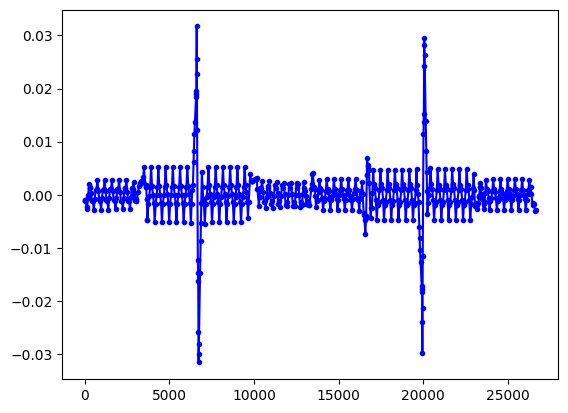

In [6]:
s_list = [monitors[ii].s[0,0] for ii in monitors]
x_list = [monitors[ii].x[0,0] for ii in monitors]
plt.plot(s_list, x_list, '.-b')